In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../input/water-potability/water_potability.csv')

In [ ]:
df.head()

In [ ]:
df.info()

>     In our this dataframe we have some datas that for determine the quality of water such as ph, hardness, potability and so on. We are supposing that ph is main factor that determines the quality of water, in reality that might not be true but in our this work we suppose so.

In [ ]:
df.isna().sum()

>    As you can see beyond we have some null values on our ph, Sulfate and Trihalomethanes columns, that is something we don't want so we need to fill these values. In our this data ph is depending given other columns such as Solids, Chloramines and etc. Filling ph with a mean value won't look that good from here because it would not be very wise to fill something with an average value that depends on many factors.  So instead of filling ph values with mean value, we are gonna predict null ph values by using linear regression.  so at this step we are only gonna fill our null Sulfate and null Trihalomethanes values. When we consider about Sulfate and Trihalomethanes columns, these values aren't depending on anything, filling them with a mean value wouldn't be that bad. So at this step we are going to fill them with mean value of the columns.

In [ ]:
mean_sulfate = df['Sulfate'].mean()
df['Sulfate'].fillna(mean_sulfate,inplace=True)

In [ ]:
mean_trihalomethanes = df['Trihalomethanes'].mean()
df['Trihalomethanes'].fillna(mean_trihalomethanes,inplace=True)

In [ ]:
df.isna().sum()

> We have have missing values only on ph column now. To start our model we need to get rid of missing values.

In [ ]:
estimating_df = df.dropna(axis=0)

> We are creating new dataframe without missing rows. In this way, we can make a healthy estimation. We will create our model on this dataframe.

In [ ]:
estimating_df

In [ ]:
estimating_df.isna().sum()

In [ ]:
X = estimating_df.drop('ph',axis=1)
y = estimating_df['ph']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

> We are spliting our data into train and tests to obtain realistic evaluation our learning model. Which means we will have two new dataframes, train and test.

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
df['other_features'] = df['Hardness']+df['Solids']+df['Chloramines']+df['Sulfate']+df['Conductivity']+df['Organic_carbon']+df['Trihalomethanes']+df['Turbidity']+df['Potability']
sns.regplot(x='other_features',y='ph',data=df)

The plot above shows us the relationship between ph and all other features, linear relationship between them can be seen. 


In [ ]:
df.drop('other_features',axis=1, inplace = True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

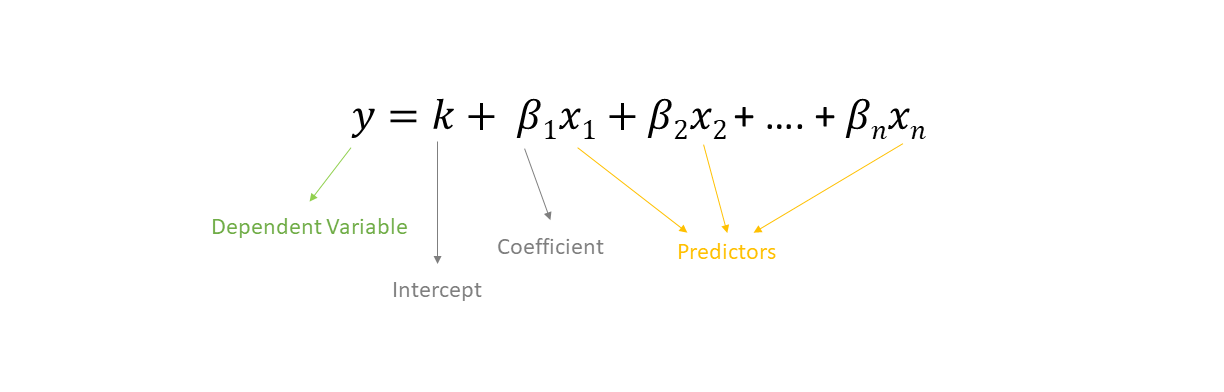
>The formulation of linear regression

> The model we are going to make predictions with is Linear Regression.

In [ ]:
model.fit(X_train,y_train)

> We are training our data with train datasets and later on we will make predictions with test datasets.

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

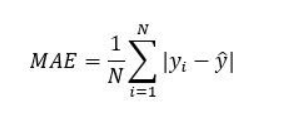
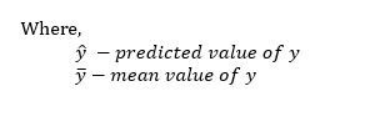
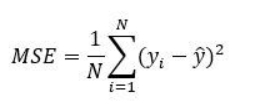
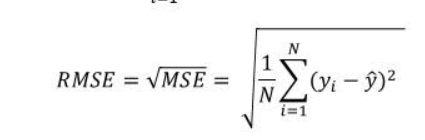

The Mean absolute error(MAE) represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
Mean Squared Error(MSE) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
Root Mean Squared Error(RMSE) is the square root of Mean Squared error. It measures the standard deviation of residuals.
Mean Squared Error(MSE) and Root Mean Square Error(RMSE) penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable.The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model, which is we have for our model.  
https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

In [ ]:
list = [MAE,MSE,RMSE]
list

In [ ]:
estimating_df['ph'].mean()

Water(H20) known as a neutral substance, so our mean value (7.0808) is pretty close the point there we want to be.

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

The coefficients are in linear regression the values are multiply predictor values.

In [ ]:
df[df['ph'].isna()]

In [ ]:
model.coef_

In [ ]:
model.intercept_

The intercept is the point where the function crosses the y-axis.

In [ ]:
prediction = [[204.890455, 20791.318981, 7.300212, 368.516441, 564.308654, 10.379783, 86.990970, 2.963135, 0]]
model.predict(prediction)

In [ ]:
204.890455*3.94388486e-03+-1.58342732e-05*20791.318981+7.300212*-2.84237170e-02+ 368.516441* 1.02102551e-03+ 564.308654*2.59649446e-04+ 10.379783*2.09308697e-02+ 86.990970* 4.17207303e-04+ 2.963135*-4.44943455e-02+ 0*1.14812711e-01+ 6.220985394877407

In [ ]:
prediction2 = [[118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0]]
model.predict(prediction2)

In [ ]:
prediction3 = [[203.204659,10643.186771,6.828936,333.775777,384.597711,16.011328,72.911573,3.065910,1]]
model.predict(prediction3)

In [ ]:
import math

list_of_row_numbers=[]
for i in df['ph'].iteritems():
    if np.isnan(i[1])==True:
        list_of_row_numbers.append(i[0])

list_of_values = []
for i in list_of_row_numbers:
    for k in df.iloc[i]:
        list_of_values.append(k)
list_of_values = [x for x in list_of_values if (math.isnan(x) != True)]

chunked_list = []
chunk_size = 9
for i in range(0, len(list_of_values),chunk_size):
    chunked_list.append(list_of_values[i:i+chunk_size])
chunked_list

predict_list=[]
for i in chunked_list:
    z=model.predict([i])
    predict_list.append(z)
predict_list

for i,k in zip(predict_list,list_of_row_numbers):
    df.loc[k,'ph'] = i

Here with this code blog we filled our first df with predicted ph values. So our data has no missing values now. 

In [ ]:
df[df['ph'].isna()]

In [ ]:
df.loc[22]

In [ ]:
predict4 = [[215.97785868806776, 17107.224225827616,
       5.607060453087125, 326.943977743867, 436.2561939726492,
       14.189062206123708, 59.85547582615388, 5.459250956028731, 0]]
model.predict(predict4)

In [ ]:
df['Acid-Base İndicator'] = ['Acid' if x<7 else 'Bas' for x in df['ph']]

Materials which has ph greater than 7 defines as  Bas and lesser than 7 defines as Acid. We created an indicator to name our water type.

In [ ]:
df

In [ ]:
Acid = len(df[df['Acid-Base İndicator'] == 'Acid'])
Bas = len(df[df['Acid-Base İndicator'] == 'Bas'])
fig1, ax1 = plt.subplots()
labels = 'Acid', 'Bas'
sizes = [Acid, Bas]
explode = (0, 0.1)  
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['red','blue'])
ax1.axis('equal')
plt.title('Acid/Bas')
plt.tight_layout()
plt.show()

46.8 percent of the waters are Acid and 53.2 percent of waters are Bas. 

In [ ]:
rounded_ph = df['ph'].astype(int)
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
sizes = rounded_ph.value_counts()
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
sizes = sizes.loc[labels]
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes,
        shadow=True, startangle=90)
total = sum(sizes)
plt.legend(
    labels = labels,
    loc='upper left',
    prop={'size': 12},
    bbox_to_anchor=(-0.05, 0.8),
    bbox_transform=fig1.transFigure
)
plt.title('pH')
ax1.axis('equal')
plt.tight_layout()
plt.show()

You can see the pH distribution of the water in the chart above.

 *The main goal of this work was making predictions for missing ph values. After finding out the linear relationship between columns we decided to use linear regression for this purpose. And then after calculating values, we created some charts to visualize ph quality of the water. Thank you for your time to view!*